# Intro to Mueller Calculus

_Written by Jaren N. Ashcraft_

This tutorial reviews Mueller Calculus in brief, though we refer the reader to Chapters 3 and 6 _Polarized Light and Optical Systems_ by Chipman, Lam, and Young for a more comprehensive tutorial.

Mueller Calculus is a $4 \times 4$ matrix calculus that traces the polarization state of light. In contrast to Jones calculus, which keeps track of the complex amplitudes of the electric field; Mueller calculus tracks the polarization of light in terms of power, or the squared modulus of the electric field. This power is described by the _Stokes Vector_ $\mathbf{s}$,

$$\mathbf{s} = [I, Q, U, V] = [S_{0}, S_{1}, S_{2}, S_{3}].$$

$\mathbf{s}$ is a 4-vector that contains the _Stokes parameters_ that describe the polarization of light. Intuitively, the parameters can be described by a set of measurements made using the following six power measurements:

 - $P_{H}$: A power measurement made with a linear polarizer oriented at $0^{\circ}$
 - $P_{V}$: A power measurement made with a linear polarizer oriented at $90^{\circ}$
 - $P_{+}$: A power measurement made with a linear polarizer oriented at $45^{\circ}$
 - $P_{-}$: A power measurement made with a linear polarizer oriented at $135^{\circ}$
 - $P_{R}$: A power measurement made with a right-circular polarizer
 - $P_{L}$: A power measurement made with a left-circular polarizer

From these measurements, the Stokes parameters are defined as follows:

$$
\mathbf{s} = 
\begin{pmatrix}
I \\
Q \\
U \\
V \\
\end{pmatrix}
=
\begin{pmatrix}
P_{H} + P_{V} \\
P_{H} - P_{V} \\
P_{+} - P_{-} \\
P_{R} - P_{L} \\
\end{pmatrix}
$$

What this means is that $I$ describes the total unpolarized power in the system, $Q$ is the degree of linear polarization along $0^{\circ}$ and $90^{\circ}$, $U$ is the degree of linear polarization along $45^{\circ}$ and $135^{\circ}$, and $V$ is the degree of circular polarization. In `katsu`, we treat the Stokes vector as a simple array of vectors.

In [ ]:
from katsu.mueller import stokes_from_parameters

s = stokes_from_parameters(1, 0, 0.25, -0.2)
print('s = ',s.T)

s =  [[ 1.    0.    0.25 -0.2 ]]


We do this because it enables the initialization of an array of Stokes parameters, which can be done by supplying a `shape` keyword.

In [ ]:
s = stokes_from_parameters(1, 0, 0.25, -0.2, shape=[32, 32])
print('array of stokes shape = ', s.shape)

array of stokes shape =  (32, 32, 4, 1)


This is done so that we can perform operations on Stokes images, which are generally 3D arrays. Below we show an example of such a homogeneous stokes image.

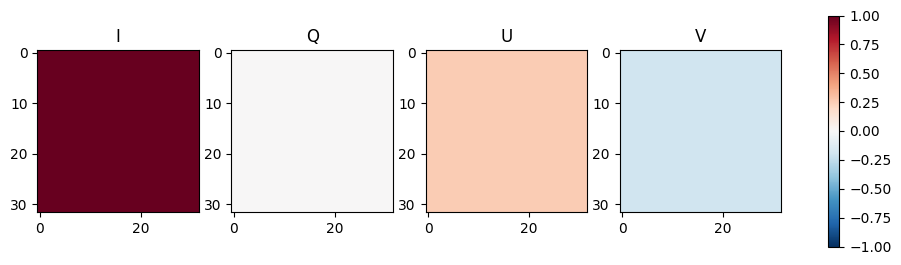

In [39]:
import matplotlib.pyplot as plt

def plot_stokes(s):

    titles = ['I', 'Q', 'U', 'V']
    fig, axs = plt.subplots(figsize=[12,3],ncols=4)
    for i, ax in enumerate(axs):
        im = ax.imshow(s[...,i,0], vmin=-1, vmax=1, cmap='RdBu_r')
        ax.set_title(titles[i])
    fig.colorbar(im, ax=axs)
    plt.show()

plot_stokes(s)

A $4 \times 1$ vector requires a corresponding $4 \times 4$ matrix operator in order to perform transformations on the vector. The operators on Stokes vectors are called _Mueller Matrices_, and take the following form:

$$
\begin{pmatrix}
M_{I\rightarrow I} & M_{Q\rightarrow I} & M_{U\rightarrow I} & M_{V\rightarrow I} \\
M_{I\rightarrow Q} & M_{Q\rightarrow Q} & M_{U\rightarrow Q} & M_{V\rightarrow Q} \\
M_{I\rightarrow U} & M_{Q\rightarrow U} & M_{U\rightarrow U} & M_{V\rightarrow U} \\
M_{I\rightarrow V} & M_{Q\rightarrow V} & M_{U\rightarrow V} & M_{V\rightarrow V} \\
\end{pmatrix}
\begin{pmatrix}
I \\
Q \\
U \\
V \\
\end{pmatrix}
=
\begin{pmatrix}
I' \\
Q' \\
U' \\
V' \\
\end{pmatrix}.
$$

Here the subscripts are of the form $A \rightarrow B$, where $A$ is the Stokes parameter before transformation and $B$ is the Stokes parameter after transformation. The "transformation" is a simple matrix multiplication. Mueller matrices are also available in `katsu`. Below we show an example of a linear polarizer oriented at $0^{\circ}$, or a "horizontal" polarizer that only passes the $Q$ parameter.

In [ ]:
from katsu.mueller import linear_polarizer

horizontal_polarizer = linear_polarizer(0)
print('Horizontal Polarizer')
print(horizontal_polarizer)

Horizontal Polarizer
[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]


Simmilarly, `katsu`'s Mueller matrices take a `shape` keyword to initialize them as an array, which we perform below.

In [41]:
horizontal_polarizer = linear_polarizer(0, shape=[32, 32])
print('polarizer shape = ', horizontal_polarizer.shape)

polarizer shape =  (32, 32, 4, 4)


Herein lies the reason why the matrix elements are packed into the final two dimensions of the array. Because both the Stokes vector and Mueller matrices are constructed in this way, we can take advantage of `numpy`'s broadcasted matrix multiplication to perform the operation. Below we use the matrix multiplication operator `@` to perform the operation.

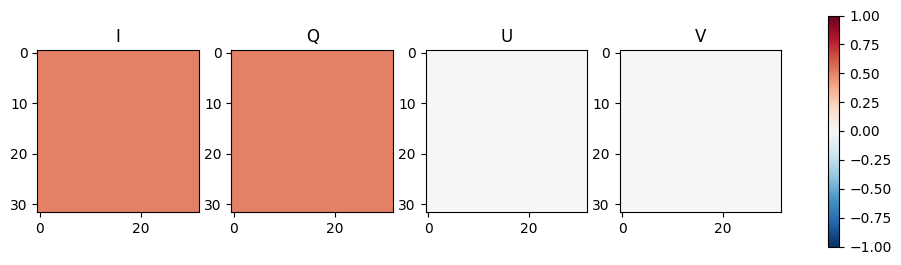

In [42]:
stokes_out = horizontal_polarizer @ s
plot_stokes(stokes_out)

This is one of `katsu`'s main features. All of the calculations are set up to take advantage of broadcasted matrix calculations so that there is no need to loop over images. Other polarizing elements, such as diattenuators and retarders, also exist in `katsu.mueller`, but will be showcased in a different demo. 